In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install nltk

In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter


In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
news_df = pd.read_parquet("/content/drive/MyDrive/2.cryptonews_processed.parquet")
news_df['content'] = news_df['title'] + '. ' + news_df['text']
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply preprocessing to the 'content' column
news_df['tokenized_content'] = news_df['content'].apply(preprocess_text)

# Display the first few rows
print(news_df[['title', 'content']].head())


                                               title  \
0  2021 Bitcoin Price Predictions: Is The Massive...   
1           Will Central Banks Hold Bitcoin in 2021?   
2  Bitcoin Is Digital Social Justice, feat. Tyron...   
3  Bitcoin hits all-time high against gold as hav...   
4  The Last Time This Indicator Flashed, Bitcoin ...   

                                             content  
0  2021 Bitcoin Price Predictions: Is The Massive...  
1  Will Central Banks Hold Bitcoin in 2021?. Cent...  
2  Bitcoin Is Digital Social Justice, feat. Tyron...  
3  Bitcoin hits all-time high against gold as hav...  
4  The Last Time This Indicator Flashed, Bitcoin ...  


In [ ]:
news_df

,title,text,source_name,date,content,tokenized_content
0,2021 Bitcoin Price Predictions: Is The Massive...,As the bitcoin price hovers under the psycholo...,Forbes,2021-01-02 00:20:00+00:00,2021 Bitcoin Price Predictions: Is The Massive...,bitcoin price prediction massive bitcoin bull ...
1,Will Central Banks Hold Bitcoin in 2021?,Central banks (CB) will hold bitcoin sooner or...,BeInCrypto,2021-01-01 20:31:35+00:00,Will Central Banks Hold Bitcoin in 2021?. Cent...,central bank hold bitcoin central bank cb hold...
2,"Bitcoin Is Digital Social Justice, feat. Tyron...",The podcaster and CEO of Onramp Invest discuss...,Coindesk,2021-01-01 19:15:02+00:00,"Bitcoin Is Digital Social Justice, feat. Tyron...",bitcoin digital social justice feat tyrone ros...
3,Bitcoin hits all-time high against gold as hav...,"BTC has hit another milestone, this time again...",Cointelegraph,2021-01-01 18:52:00+00:00,Bitcoin hits all-time high against gold as hav...,bitcoin hit alltime high gold battle rage btc ...
4,"The Last Time This Indicator Flashed, Bitcoin ...",Bitcoin has been facing some turbulence as of ...,Bitcoinist,2021-01-01 18:00:00+00:00,"The Last Time This Indicator Flashed, Bitcoin ...",last time indicator flashed bitcoin dropped ba...
...,...,...,...,...,...,...
159481,XRP News Today: BTC Hits $91k; Will SEC Appeal...,"XRP price drops below $2, weighed by SEC appea...",FXEmpire,2024-12-31 05:34:31+00:00,XRP News Today: BTC Hits $91k; Will SEC Appeal...,xrp news today btc hit k sec appeal drive xrp ...
159482,Tether Moves Bitcoin Worth $780M to Reserve in...,"Tether, the issuer of the world's most widely ...",Cryptonews,2024-12-31 05:28:54+00:00,Tether Moves Bitcoin Worth $780M to Reserve in...,tether move bitcoin worth reserve largest move...
159483,The Bull Run Continues; Bitfinex Projects $200...,Digital asset exchange Bitfinex predicted an u...,Zycrypto,2024-12-31 05:21:59+00:00,The Bull Run Continues; Bitfinex Projects $200...,bull run continues bitfinex project bitcoin pr...
159484,MicroStrategy shares drop 8% after year-end Bi...,MicroStrategy shares plunged more than 8% foll...,Cryptopolitan,2024-12-31 05:08:01+00:00,MicroStrategy shares drop 8% after year-end Bi...,microstrategy share drop yearend bitcoin buy r...


# Assign Topic from keywords

In [ ]:
topics_keywords = {
    'Economy':[ 'surge', 'rise', 'decline',  'dollar', 'inflation', 'finance', 'country',  'fear',  'china',  'economic', 'rising', 'growing', 'invest',  'optimism', 'rebound', 'treasury', 'plunge', 'collapse']
    ,
    'Technology': ['crypto', 'eth', 'news', 'network', 'security', 'platform', 'technical', 'grayscale', 'announced', 'twitter', 'founder', 'energy', 'tesla', 'development', 'cofounder', 'milestone', 'lightning',  'gbtc', 'flagship', 'technology']
    ,
    'Regulation':['sec', 'fed','approval', 'xrp', 'commission', 'federal', 'shortterm', 'regulatory', 'doge', 'bill', 'ftx', 'government']
    ,
    'Market Analysis': ['price', 'market','analyst', 'asset',  'investor' 'spot', 'trading', 'mining', 'exchange', 'trader', 'bull', 'surge', 'hit', 'potential', 'financial', 'volatility', 'decline']
    ,
    'Adoption':['microstrategy', 'adoption', 'fee', 'ark', 'dad', 'filing']    ,
    'Cybersecurity': ['cryptocurrency', 'bitcoins', 'ethereum', 'alltime', 'halving', 'blockchain', 'coinbase', 'saylor', 'hodl', 'btcs', 'solana', 'tldr']
    }


In [ ]:
for topic,keywords in topics_keywords.items():
    print(f"Topic: {topic}")
    print(f"Keywords: {keywords}")

Topic: Economy
Keywords: ['surge', 'rise', 'decline', 'dollar', 'inflation', 'finance', 'country', 'fear', 'china', 'economic', 'rising', 'growing', 'invest', 'optimism', 'rebound', 'treasury', 'plunge', 'collapse']
Topic: Technology
Keywords: ['crypto', 'eth', 'news', 'network', 'security', 'platform', 'technical', 'grayscale', 'announced', 'twitter', 'founder', 'energy', 'tesla', 'development', 'cofounder', 'milestone', 'lightning', 'gbtc', 'flagship', 'technology']
Topic: Regulation
Keywords: ['sec', 'fed', 'approval', 'xrp', 'commission', 'federal', 'shortterm', 'regulatory', 'doge', 'bill', 'ftx', 'government']
Topic: Market Analysis
Keywords: ['price', 'market', 'analyst', 'asset', 'investorspot', 'trading', 'mining', 'exchange', 'trader', 'bull', 'surge', 'hit', 'potential', 'financial', 'volatility', 'decline']
Topic: Adoption
Keywords: ['microstrategy', 'adoption', 'fee', 'ark', 'dad', 'filing']
Topic: Cybersecurity
Keywords: ['cryptocurrency', 'bitcoins', 'ethereum', 'alltime

In [ ]:
def assign_topic(text, percentage=0.3):
    topic_scores = {}
    for topic, keywords in topics_keywords.items():
        score = 0
        for keyword in keywords:
            pattern = r'\b' + re.escape(keyword.lower()) + r'\b'
            matches = re.findall(pattern, text.lower())
            score += len(matches)
        topic_scores[topic] = score
    max_score = max(topic_scores.values())
    assigned_topics = [topic for topic, score in topic_scores.items() if score >= percentage * max_score and score > 0]
    if not assigned_topics:
        assigned_topics = ['Other']
    return assigned_topics


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
# def cosine_similarity(v1, v2):
#     # Compute cosine similarity between two vectors
#     dot_product = np.dot(v1, v2)
#     norm_v1 = norm(v1)
#     norm_v2 = norm(v2)
#     return dot_product / (norm_v1 * norm_v2)

def assign_topic_with_glove(text, glove_model, percentage=0.3, similarity_threshold=0.7):
    topic_scores = {}
    # Tokenize the input text
    text_tokens = text.lower().split()
    text_vectors = [glove_model[word] for word in text_tokens if word in glove_model]

    for topic, keywords in topics_keywords.items():
        score = 0
        for keyword in keywords:
            keyword = keyword.lower()
            # Direct match
            if keyword in text.lower():
                score += 1
                continue

            # Semantic similarity using GloVe
            if keyword in glove_model:
                keyword_vector = glove_model[keyword]
                for text_vector in text_vectors:
                    # Calculate cosine similarity
                    similarity = cosine_similarity(
                        keyword_vector.reshape(1, -1),
                        text_vector.reshape(1, -1)
                    )[0][0]
                    if similarity >= similarity_threshold:
                        score += similarity

        topic_scores[topic] = score

    max_score = max(topic_scores.values()) if topic_scores else 0
    assigned_topics = [
        topic for topic, score in topic_scores.items()
        if score >= percentage * max_score and score > 0
    ]

    if not assigned_topics:
        assigned_topics = ['Other']

    return assigned_topics

# Usage example:
# First load GloVe embeddings
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# Load the GloVe model
glove_model = KeyedVectors.load_word2vec_format("/content/drive/MyDrive/word2vec_glove.42B.300d.txt", binary=False)
assign_df = news_df

# Apply to DataFrame
assign_df['topic'] = assign_df['tokenized_content'].apply(
    lambda x: assign_topic_with_glove(x, glove_model)
)
assign_df.head()


In [ ]:
# assign_df = news_df
# assign_df['topic'] = assign_df['tokenized_content'].apply(assign_topic)
# assign_df.head()


                                               title  \
0  2021 Bitcoin Price Predictions: Is The Massive...   
1           Will Central Banks Hold Bitcoin in 2021?   
2  Bitcoin Is Digital Social Justice, feat. Tyron...   
3  Bitcoin hits all-time high against gold as hav...   
4  The Last Time This Indicator Flashed, Bitcoin ...   

                                                text    source_name  \
0  As the bitcoin price hovers under the psycholo...         Forbes   
1  Central banks (CB) will hold bitcoin sooner or...     BeInCrypto   
2  The podcaster and CEO of Onramp Invest discuss...       Coindesk   
3  BTC has hit another milestone, this time again...  Cointelegraph   
4  Bitcoin has been facing some turbulence as of ...     Bitcoinist   

                       date  \
0 2021-01-02 00:20:00+00:00   
1 2021-01-01 20:31:35+00:00   
2 2021-01-01 19:15:02+00:00   
3 2021-01-01 18:52:00+00:00   
4 2021-01-01 18:00:00+00:00   

                                             cont

In [ ]:
assign_df.to_parquet("/content/drive/MyDrive/KeywordBasedABSA.parquet")

In [ ]:
assign_df = pd.read_parquet("/content/drive/MyDrive/KeywordBasedABSA.parquet")
assign_df.head()

,title,text,source_name,date,content,tokenized_content,topic
0,2021 Bitcoin Price Predictions: Is The Massive...,As the bitcoin price hovers under the psycholo...,Forbes,2021-01-02 00:20:00+00:00,2021 Bitcoin Price Predictions: Is The Massive...,bitcoin price prediction massive bitcoin bull ...,[Market Analysis]
1,Will Central Banks Hold Bitcoin in 2021?,Central banks (CB) will hold bitcoin sooner or...,BeInCrypto,2021-01-01 20:31:35+00:00,Will Central Banks Hold Bitcoin in 2021?. Cent...,central bank hold bitcoin central bank cb hold...,[Economy]
2,"Bitcoin Is Digital Social Justice, feat. Tyron...",The podcaster and CEO of Onramp Invest discuss...,Coindesk,2021-01-01 19:15:02+00:00,"Bitcoin Is Digital Social Justice, feat. Tyron...",bitcoin digital social justice feat tyrone ros...,[Other]
3,Bitcoin hits all-time high against gold as hav...,"BTC has hit another milestone, this time again...",Cointelegraph,2021-01-01 18:52:00+00:00,Bitcoin hits all-time high against gold as hav...,bitcoin hit alltime high gold battle rage btc ...,[Other]
4,"The Last Time This Indicator Flashed, Bitcoin ...",Bitcoin has been facing some turbulence as of ...,Bitcoinist,2021-01-01 18:00:00+00:00,"The Last Time This Indicator Flashed, Bitcoin ...",last time indicator flashed bitcoin dropped ba...,[Market Analysis]


# Bag of words

In [ ]:
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
import re
from functools import lru_cache
import nltk
from tqdm import tqdm
import datetime

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

class BitcoinNewsClassifier:
    # [Previous __init__, setup_topics, and other methods remain the same until analyze_news]
    def __init__(self, glove_path):
      self.embedding_dim = 300
      self.glove_embeddings = self.load_glove_embeddings(glove_path)
      self.setup_topics()
      self.initialize_topic_embeddings()

    def load_glove_embeddings(self, glove_path):
        print("Loading GloVe embeddings...")
        embeddings = {}
        word_vectors = KeyedVectors.load_word2vec_format(glove_path, binary=False)

        print("GloVe embeddings loaded successfully")
        return word_vectors

    def setup_topics(self):
        self.topic_keywords = {
            'economy': [
                'bitcoin', 'inflation', 'monetary', 'hedge', 'reserve', 'currency', 'dollar',
                'fed', 'economy', 'macro', 'recession', 'treasury', 'investment', 'store_of_value',
                'gold', 'institutional', 'portfolio', 'asset', 'banking', 'financial'
            ],
            'technology': [
                'blockchain', 'lightning', 'network', 'protocol', 'node', 'mining', 'hash',
                'taproot', 'segwit', 'upgrade', 'wallet', 'development', 'scalability',
                'layer2', 'software', 'bitcoin_core', 'mempool', 'block', 'transaction'
            ],
            'regulation': [
                'sec', 'regulation', 'compliance', 'legal', 'ban', 'regulatory', 'government',
                'policy', 'tax', 'kyc', 'aml', 'license', 'framework', 'legislation',
                'congress', 'senate', 'bill', 'restriction', 'approval', 'etf'
            ],
            'market_analysis': [
                'price', 'trading', 'market', 'analysis', 'volatility', 'volume', 'exchange',
                'resistance', 'support', 'bull', 'bear', 'trend', 'chart', 'technical',
                'correction', 'rally', 'momentum', 'liquidation', 'futures', 'options'
            ],
            'adoption': [
                'adoption', 'payment', 'merchant', 'acceptance', 'integration', 'mainstream',
                'institutional', 'corporate', 'company', 'retail', 'el_salvador', 'country',
                'remittance', 'mass_adoption', 'usage', 'implementation', 'partnership'
            ],
            'cybersecurity': [
                'security', 'hack', 'breach', 'theft', 'wallet', 'private_key', 'encryption',
                'protection', 'attack', '51_percent', 'vulnerability', 'exploit', 'phishing',
                'scam', 'fraud', 'malware', 'ransomware', 'cold_storage', 'custody'
            ]
        }

        self.keyword_weights = {
            'economy': {
                'bitcoin': 0, 'inflation': 1.3, 'monetary': 1.2,
                'hedge': 1.2, 'reserve': 1.1
            },
            'technology': {
                'blockchain': 1.5, 'lightning': 1.3, 'mining': 1.3,
                'protocol': 1.2, 'node': 1.2
            },
            'regulation': {
                'sec': 1.5, 'etf': 1.4, 'regulation': 1.3,
                'compliance': 1.2, 'tax': 1.2
            },
            'market_analysis': {
                'price': 1.5, 'trading': 1.3, 'market': 1.3,
                'volatility': 1.2, 'analysis': 1.2
            },
            'adoption': {
                'adoption': 1.5, 'payment': 1.3, 'institutional': 1.3,
                'el_salvador': 1.2, 'mainstream': 1.2
            },
            'cybersecurity': {
                'security': 1.5, 'hack': 1.3, 'breach': 1.3,
                'theft': 1.2, 'scam': 1.2
            }
        }

        self.context_phrases = {
            'economy': [
                'store of value', 'digital gold', 'monetary policy',
                'inflation hedge', 'reserve currency'
            ],
            'technology': [
                'lightning network', 'block size', 'hash rate',
                'proof of work', 'bitcoin core'
            ],
            'regulation': [
                'spot etf', 'regulatory approval', 'securities law',
                'regulatory framework', 'legal status'
            ],
            'market_analysis': [
                'price action', 'market sentiment', 'trading volume',
                'technical analysis', 'price prediction'
            ],
            'adoption': [
                'mass adoption', 'institutional adoption', 'payment solution',
                'merchant adoption', 'corporate treasury'
            ],
            'cybersecurity': [
                'private key', 'cold storage', 'security breach',
                'wallet security', '51 percent attack'
            ]
        }

    def preprocess_text(self, text):
        # Convert to lowercase
        text = text.lower()

        # Remove special characters
        text = re.sub(r'[^\w\s]', ' ', text)

        # Tokenize
        tokens = word_tokenize(text)

        # Remove stopwords and numbers
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words and not token.isnumeric()]

        return tokens

    @lru_cache(maxsize=10000)
    def get_word_embedding(self, word):
        return self.glove_embeddings.get(word, np.zeros(self.embedding_dim))

    def get_document_embedding(self, tokens):
        vectors = []
        for token in tokens:
            if token in self.glove_embeddings:
                vectors.append(self.glove_embeddings[token])

        if not vectors:
            return np.zeros(self.embedding_dim)

        return np.mean(vectors, axis=0)

    def get_topic_embedding_weighted(self, topic):
        vectors = []
        weights = []

        topic_weights = self.keyword_weights.get(topic, {})

        for keyword in self.topic_keywords[topic]:
            if '_' in keyword:
                parts = keyword.split('_')
                part_vectors = [self.glove_embeddings[p] for p in parts if p in self.glove_embeddings]
                if part_vectors:
                    vector = np.mean(part_vectors, axis=0)
                    vectors.append(vector)
                    weights.append(topic_weights.get(keyword, 1.0))
            elif keyword in self.glove_embeddings:
                vectors.append(self.glove_embeddings[keyword])
                weights.append(topic_weights.get(keyword, 1.0))

        if not vectors:
            return np.zeros(self.embedding_dim)

        weights = np.array(weights) / sum(weights)
        return np.average(vectors, axis=0, weights=weights)

    def initialize_topic_embeddings(self):
        self.topic_embeddings = {
            topic: self.get_topic_embedding_weighted(topic)
            for topic in self.topic_keywords.keys()
        }

    def classify_text(self, text, threshold=0.3):
        # Preprocess text
        tokens = self.preprocess_text(text)

        # Get document embedding
        doc_embedding = self.get_document_embedding(tokens)

        # Calculate similarities with each topic
        similarities = {}
        for topic, topic_embedding in self.topic_embeddings.items():
            similarity = cosine_similarity(
                doc_embedding.reshape(1, -1),
                topic_embedding.reshape(1, -1)
            )[0][0]
            similarities[topic] = similarity

        # Check for context phrases
        text_lower = text.lower()
        for topic, phrases in self.context_phrases.items():
            if any(phrase in text_lower for phrase in phrases):
                similarities[topic] = max(similarities.get(topic, 0), threshold + 0.1)

        # Get topics above threshold
        assigned_topics = [
            topic for topic, score in similarities.items()
            if score > threshold
        ]

        # If no topic above threshold, return the highest scoring topic
        if not assigned_topics:
            assigned_topics = [max(similarities.items(), key=lambda x: x[1])[0]]

        return assigned_topics, similarities


    def analyze_news_df(self, news_df):
        """
        Analyze news from a DataFrame containing date, title, text, and source columns
        """
        # Create columns for results
        news_df['topics'] = None
        news_df['topic_scores'] = None
        news_df['primary_topic'] = None

        # Process each news article
        print("Classifying news articles...")
        results = []

        for idx, row in tqdm(news_df.iterrows(), total=len(news_df)):
            # Combine title and text for analysis
            full_text = f"{row['title']} {row['text']}"

            # Get classification results
            assigned_topics, similarities = self.classify_text(full_text)

            # Store results
            results.append({
                'topics': assigned_topics,
                'topic_scores': similarities,
                'primary_topic': max(similarities.items(), key=lambda x: x[1])[0]
            })

        # Add results to DataFrame
        news_df['topics'] = [r['topics'] for r in results]
        news_df['topic_scores'] = [r['topic_scores'] for r in results]
        news_df['primary_topic'] = [r['primary_topic'] for r in results]

        return news_df

    def generate_topic_summary(self, classified_df):
        """
        Generate summary statistics for the classified news
        """
        summary = {
            'total_articles': len(classified_df),
            'topic_distribution': {},
            'topic_trends': {},
            'source_distribution': {}
        }

        # Topic distribution
        topic_counts = classified_df['primary_topic'].value_counts()
        summary['topic_distribution'] = topic_counts.to_dict()

        # Topic trends over time (monthly)
        classified_df['month'] = pd.to_datetime(classified_df['date']).dt.to_period('M')
        topic_trends = classified_df.groupby(['month', 'primary_topic']).size().unstack(fill_value=0)
        summary['topic_trends'] = topic_trends.to_dict()

        # Source distribution
        source_topic_dist = classified_df.groupby(['source', 'primary_topic']).size().unstack(fill_value=0)
        summary['source_distribution'] = source_topic_dist.to_dict()

        return summary

    def plot_topic_trends(self, classified_df):
        """
        Plot topic trends over time
        """
        try:
            import matplotlib.pyplot as plt
            import seaborn as sns

            # Prepare data
            classified_df['month'] = pd.to_datetime(classified_df['date']).dt.to_period('M')
            topic_trends = classified_df.groupby(['month', 'primary_topic']).size().unstack(fill_value=0)

            # Create plot
            plt.figure(figsize=(15, 8))
            for topic in topic_trends.columns:
                plt.plot(topic_trends.index.astype(str), topic_trends[topic], label=topic, marker='o')

            plt.title('Bitcoin News Topics Trend Over Time')
            plt.xlabel('Month')
            plt.ylabel('Number of Articles')
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.grid(True, alpha=0.3)

            return plt

        except ImportError:
            print("Matplotlib and/or seaborn not installed. Please install for visualization capabilities.")
            return None

# Example usage
# Load your news DataFrame
# Assuming your DataFrame has columns: date, title, text, source
news_df = pd.read_parquet("/content/drive/MyDrive/2.cryptonews_processed.parquet")
news_df['content'] = news_df['title'] + '. ' + news_df['text']

bow_news_df = news_df

# Initialize classifier
classifier = BitcoinNewsClassifier('/content/drive/MyDrive/word2vec_glove.42B.300d.txt')

# Classify all news articles
classified_df = classifier.analyze_news_df(bow_news_df)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading GloVe embeddings...
GloVe embeddings loaded successfully
Classifying news articles...


100%|██████████| 155376/155376 [09:14<00:00, 280.39it/s]


KeyError: 'source'

In [ ]:
# Generate summary
summary = classifier.generate_topic_summary(classified_df)

# Print summary statistics
print("\nClassification Summary:")
print("-" * 50)
print(f"Total articles analyzed: {summary['total_articles']}")
print("\nTopic Distribution:")
for topic, count in summary['topic_distribution'].items():
    print(f"{topic}: {count} articles ({count/summary['total_articles']*100:.1f}%)")

# Plot trends
plt = classifier.plot_topic_trends(classified_df)
if plt:
    plt.show()

# Example of getting articles for a specific topic
print("\nSample Articles for 'regulation' topic:")
regulation_articles = classified_df[classified_df['primary_topic'] == 'regulation']
for _, article in regulation_articles.head().iterrows():
    print(f"\nDate: {article['date']}")
    print(f"Title: {article['title']}")
    print(f"Source: {article['source']}")
    print(f"Topics: {article['topics']}")
    print("-" * 50)


# Sentiment Analysis

In [ ]:
news_df = pd.read_parquet("/content/drive/MyDrive/KeywordBasedABSA.parquet")
news_df.head()

,title,text,source_name,date,content,tokenized_content,topic
0,2021 Bitcoin Price Predictions: Is The Massive...,As the bitcoin price hovers under the psycholo...,Forbes,2021-01-02 00:20:00+00:00,2021 Bitcoin Price Predictions: Is The Massive...,bitcoin price prediction massive bitcoin bull ...,"[Economy, Market Analysis]"
1,Will Central Banks Hold Bitcoin in 2021?,Central banks (CB) will hold bitcoin sooner or...,BeInCrypto,2021-01-01 20:31:35+00:00,Will Central Banks Hold Bitcoin in 2021?. Cent...,central bank hold bitcoin central bank cb hold...,[Market Analysis]
2,"Bitcoin Is Digital Social Justice, feat. Tyron...",The podcaster and CEO of Onramp Invest discuss...,Coindesk,2021-01-01 19:15:02+00:00,"Bitcoin Is Digital Social Justice, feat. Tyron...",bitcoin digital social justice feat tyrone ros...,"[Economy, Technology, Market Analysis]"
3,Bitcoin hits all-time high against gold as hav...,"BTC has hit another milestone, this time again...",Cointelegraph,2021-01-01 18:52:00+00:00,Bitcoin hits all-time high against gold as hav...,bitcoin hit alltime high gold battle rage btc ...,[Market Analysis]
4,"The Last Time This Indicator Flashed, Bitcoin ...",Bitcoin has been facing some turbulence as of ...,Bitcoinist,2021-01-01 18:00:00+00:00,"The Last Time This Indicator Flashed, Bitcoin ...",last time indicator flashed bitcoin dropped ba...,[Market Analysis]


In [ ]:
pip install transformers sentencepiece datasets fsspec==2024.10.0


INFO: pip is looking at multiple versions of datasets to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of datasets to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.5 MB/s e

In [ ]:
pip install datasets fsspec==2024.10.0

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.nn import functional as F
from datasets import Dataset
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-distilled-squad")
model = model.to(device)
def batch_sentiment(batch):
    # Tokenize the texts with truncation and padding
    inputs = tokenizer(
        batch['content'],
        truncation=True,       # Truncate sequences longer than max_length
        padding=True,          # Pad sequences to the longest in the batch
        max_length=512,        # Set the maximum sequence length to 512
        return_tensors='pt'
    )

    # Move tensors to the appropriate device (CPU or GPU)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Get model outputs without calculating gradients (for efficiency)
    with torch.no_grad():
        outputs = model(**inputs)

    # Get logits from the outputs
    logits = outputs.logits

    # Apply softmax to get probabilities (optional)
    probabilities = torch.softmax(logits, dim=-1)

    # Get the predicted class indices
    predictions = torch.argmax(logits, dim=-1)

    # Map predictions to sentiment labels
    # Assuming the model uses the following label mapping:
    # 0 -> 'Negative', 1 -> 'Neutral', 2 -> 'Positive'
    label_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    sentiments = [label_mapping[int(prediction)] for prediction in predictions]

    # Alternatively, you can include probabilities with the sentiments
    # sentiments = [{'label': label_mapping[int(prediction)], 'score': float(probabilities[i][prediction])} for i, prediction in enumerate(predictions)]

    # Return sentiments as a list
    return {'sentiment': sentiments}

df = pd.read_parquet("/content/KeywordBasedABSA.parquet")
dataset = Dataset.from_pandas(df)
results = dataset.map(batch_sentiment, batched=True, batch_size=8)

# Convert the results back to a DataFrame
df_results = results.to_pandas()

df_results.to_parquet("finbert_keyword_based.parquet")
df_results.head()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/451 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/155376 [00:00<?, ? examples/s]

,title,text,source_name,date,content,tokenized_content,topic,__index_level_0__,sentiment
0,2021 Bitcoin Price Predictions: Is The Massive...,As the bitcoin price hovers under the psycholo...,Forbes,2021-01-02 00:20:00+00:00,2021 Bitcoin Price Predictions: Is The Massive...,bitcoin price prediction massive bitcoin bull ...,"[Economy, Market Analysis]",0,Positive
1,Will Central Banks Hold Bitcoin in 2021?,Central banks (CB) will hold bitcoin sooner or...,BeInCrypto,2021-01-01 20:31:35+00:00,Will Central Banks Hold Bitcoin in 2021?. Cent...,central bank hold bitcoin central bank cb hold...,[Market Analysis],1,Positive
2,"Bitcoin Is Digital Social Justice, feat. Tyron...",The podcaster and CEO of Onramp Invest discuss...,Coindesk,2021-01-01 19:15:02+00:00,"Bitcoin Is Digital Social Justice, feat. Tyron...",bitcoin digital social justice feat tyrone ros...,"[Economy, Technology, Market Analysis]",2,Positive
3,Bitcoin hits all-time high against gold as hav...,"BTC has hit another milestone, this time again...",Cointelegraph,2021-01-01 18:52:00+00:00,Bitcoin hits all-time high against gold as hav...,bitcoin hit alltime high gold battle rage btc ...,[Market Analysis],3,Negative
4,"The Last Time This Indicator Flashed, Bitcoin ...",Bitcoin has been facing some turbulence as of ...,Bitcoinist,2021-01-01 18:00:00+00:00,"The Last Time This Indicator Flashed, Bitcoin ...",last time indicator flashed bitcoin dropped ba...,[Market Analysis],4,Neutral


In [ ]:
news_df = df_results
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
news_df['sentiment'] = news_df['sentiment'].map(sentiment_mapping)
news_df.head()

NameError: name 'df_results' is not defined

In [ ]:
news_df.to_parquet('/content/drive/MyDrive/scored_keyword_based_news.parquet.gzip',compression='gzip')

# save

In [ ]:
news_df = pd.read_parquet("/content/drive/MyDrive/scored_keyword_based_news.parquet.gzip")
topic_df = pd.read_parquet("/content/drive/MyDrive/tokenizednews_topic.parquet.gzip")
topics_col = topic_df["topic"]
news_df["topic"] =  topic_df["topic"]
news_df.head()

,title,text,source_name,date,content,tokenized_content,topic,__index_level_0__,sentiment
0,2021 Bitcoin Price Predictions: Is The Massive...,As the bitcoin price hovers under the psycholo...,Forbes,2021-01-02 00:20:00+00:00,2021 Bitcoin Price Predictions: Is The Massive...,bitcoin price prediction massive bitcoin bull ...,[Market Analysis],0,1
1,Will Central Banks Hold Bitcoin in 2021?,Central banks (CB) will hold bitcoin sooner or...,BeInCrypto,2021-01-01 20:31:35+00:00,Will Central Banks Hold Bitcoin in 2021?. Cent...,central bank hold bitcoin central bank cb hold...,[Economy],1,1
2,"Bitcoin Is Digital Social Justice, feat. Tyron...",The podcaster and CEO of Onramp Invest discuss...,Coindesk,2021-01-01 19:15:02+00:00,"Bitcoin Is Digital Social Justice, feat. Tyron...",bitcoin digital social justice feat tyrone ros...,[Other],2,1
3,Bitcoin hits all-time high against gold as hav...,"BTC has hit another milestone, this time again...",Cointelegraph,2021-01-01 18:52:00+00:00,Bitcoin hits all-time high against gold as hav...,bitcoin hit alltime high gold battle rage btc ...,[Other],3,-1
4,"The Last Time This Indicator Flashed, Bitcoin ...",Bitcoin has been facing some turbulence as of ...,Bitcoinist,2021-01-01 18:00:00+00:00,"The Last Time This Indicator Flashed, Bitcoin ...",last time indicator flashed bitcoin dropped ba...,[Market Analysis],4,0


In [ ]:
topic_columns = ['Economy', 'Market Analysis', 'Technology', 'Adoption',
                 'Cybersecurity', 'Others', 'Regulation']
news = news_df
df_exploded = news.explode('topic')

# Use one-hot encoding to create binary columns for each unique topic
df_one_hot = pd.get_dummies(df_exploded['topic'], prefix='', prefix_sep='')

# Group back to the original structure by summing up binary columns
df_final = df_one_hot.groupby(df_exploded.index).sum()

# Combine the binary columns with the original DataFrame
df = pd.concat([news, df_final], axis=1)
df.head()

,title,text,source_name,date,content,tokenized_content,topic,__index_level_0__,sentiment,Adoption,Cybersecurity,Economy,Market Analysis,Other,Regulation,Technology
0,2021 Bitcoin Price Predictions: Is The Massive...,As the bitcoin price hovers under the psycholo...,Forbes,2021-01-02 00:20:00+00:00,2021 Bitcoin Price Predictions: Is The Massive...,bitcoin price prediction massive bitcoin bull ...,[Market Analysis],0,1,0,0,0,1,0,0,0
1,Will Central Banks Hold Bitcoin in 2021?,Central banks (CB) will hold bitcoin sooner or...,BeInCrypto,2021-01-01 20:31:35+00:00,Will Central Banks Hold Bitcoin in 2021?. Cent...,central bank hold bitcoin central bank cb hold...,[Economy],1,1,0,0,1,0,0,0,0
2,"Bitcoin Is Digital Social Justice, feat. Tyron...",The podcaster and CEO of Onramp Invest discuss...,Coindesk,2021-01-01 19:15:02+00:00,"Bitcoin Is Digital Social Justice, feat. Tyron...",bitcoin digital social justice feat tyrone ros...,[Other],2,1,0,0,0,0,1,0,0
3,Bitcoin hits all-time high against gold as hav...,"BTC has hit another milestone, this time again...",Cointelegraph,2021-01-01 18:52:00+00:00,Bitcoin hits all-time high against gold as hav...,bitcoin hit alltime high gold battle rage btc ...,[Other],3,-1,0,0,0,0,1,0,0
4,"The Last Time This Indicator Flashed, Bitcoin ...",Bitcoin has been facing some turbulence as of ...,Bitcoinist,2021-01-01 18:00:00+00:00,"The Last Time This Indicator Flashed, Bitcoin ...",last time indicator flashed bitcoin dropped ba...,[Market Analysis],4,0,0,0,0,1,0,0,0


In [ ]:
processed_news = df.drop(["__index_level_0__", "content", "text", "title", "source_name","topic"], axis=1)

processed_news.head()

,date,tokenized_content,sentiment,Adoption,Cybersecurity,Economy,Market Analysis,Other,Regulation,Technology
0,2021-01-02 00:20:00+00:00,bitcoin price prediction massive bitcoin bull ...,1,0,0,0,1,0,0,0
1,2021-01-01 20:31:35+00:00,central bank hold bitcoin central bank cb hold...,1,0,0,1,0,0,0,0
2,2021-01-01 19:15:02+00:00,bitcoin digital social justice feat tyrone ros...,1,0,0,0,0,1,0,0
3,2021-01-01 18:52:00+00:00,bitcoin hit alltime high gold battle rage btc ...,-1,0,0,0,0,1,0,0
4,2021-01-01 18:00:00+00:00,last time indicator flashed bitcoin dropped ba...,0,0,0,0,1,0,0,0


In [ ]:
weights = {
    'Adoption': 0.08,
    'Cybersecurity': 0.10,
    'Economy': 0.25,
    'Market Analysis': 0.30,
    'Other': 0.02,
    'Regulation': 0.10,
    'Technology': 0.15
}
processed_news['weighted_sentiment'] = (
    df['Adoption'] * weights['Adoption'] +
    df['Cybersecurity'] * weights['Cybersecurity'] +
    df['Economy'] * weights['Economy'] +
    df['Market Analysis'] * weights['Market Analysis'] +
    df['Other'] * weights['Other'] +
    df['Regulation'] * weights['Regulation'] +
    df['Technology'] * weights['Technology']
)

processed_news.head()

,date,tokenized_content,sentiment,Adoption,Cybersecurity,Economy,Market Analysis,Other,Regulation,Technology,weighted_sentiment
0,2021-01-02 00:20:00+00:00,bitcoin price prediction massive bitcoin bull ...,1,0,0,0,1,0,0,0,0.30
1,2021-01-01 20:31:35+00:00,central bank hold bitcoin central bank cb hold...,1,0,0,1,0,0,0,0,0.25
2,2021-01-01 19:15:02+00:00,bitcoin digital social justice feat tyrone ros...,1,0,0,0,0,1,0,0,0.02
3,2021-01-01 18:52:00+00:00,bitcoin hit alltime high gold battle rage btc ...,-1,0,0,0,0,1,0,0,0.02
4,2021-01-01 18:00:00+00:00,last time indicator flashed bitcoin dropped ba...,0,0,0,0,1,0,0,0,0.30


In [ ]:
last = processed_news
last['date'] = pd.to_datetime(last['date'])

# Group by date and sum up all other columns

df_grouped = df.groupby(last['date'].dt.date).sum(numeric_only=True).reset_index()

# Rename the 'date' column for clarity
df_grouped.rename(columns={'date': 'grouped_date'}, inplace=True)
df_grouped.head()


,grouped_date,__index_level_0__,sentiment,Adoption,Cybersecurity,Economy,Market Analysis,Other,Regulation,Technology
0,2021-01-01,638,-9,1,1,1,19,9,1,0
1,2021-01-02,2541,-20,0,0,1,34,7,0,1
2,2021-01-03,3840,-7,2,0,3,31,7,1,0
3,2021-01-04,10311,-8,2,0,1,50,12,1,1
4,2021-01-05,14550,3,2,0,5,48,10,3,1


In [ ]:
df_grouped.drop(["__index_level_0__","Other"],axis=1)

,grouped_date,sentiment,Adoption,Cybersecurity,Economy,Market Analysis,Regulation,Technology
0,2021-01-01,-9,1,1,1,19,1,0
1,2021-01-02,-20,0,0,1,34,0,1
2,2021-01-03,-7,2,0,3,31,1,0
3,2021-01-04,-8,2,0,1,50,1,1
4,2021-01-05,3,2,0,5,48,3,1
...,...,...,...,...,...,...,...,...
1457,2024-12-28,8,6,1,5,46,7,6
1458,2024-12-29,-7,4,2,5,36,8,5
1459,2024-12-30,-24,12,4,16,117,23,11
1460,2024-12-31,-15,5,1,8,93,7,15


In [ ]:
df_grouped.to_parquet("/content/drive/MyDrive/keybased_grouped.parquet")

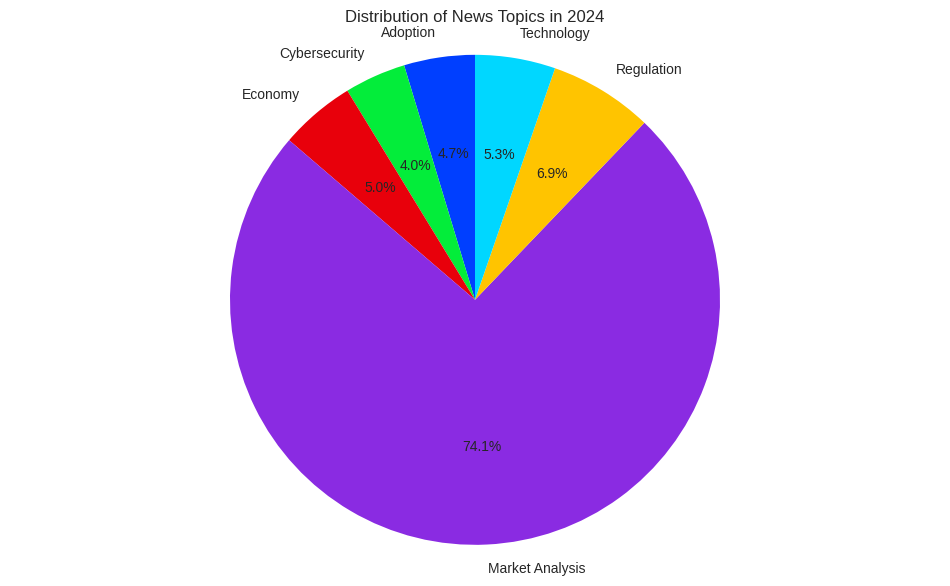

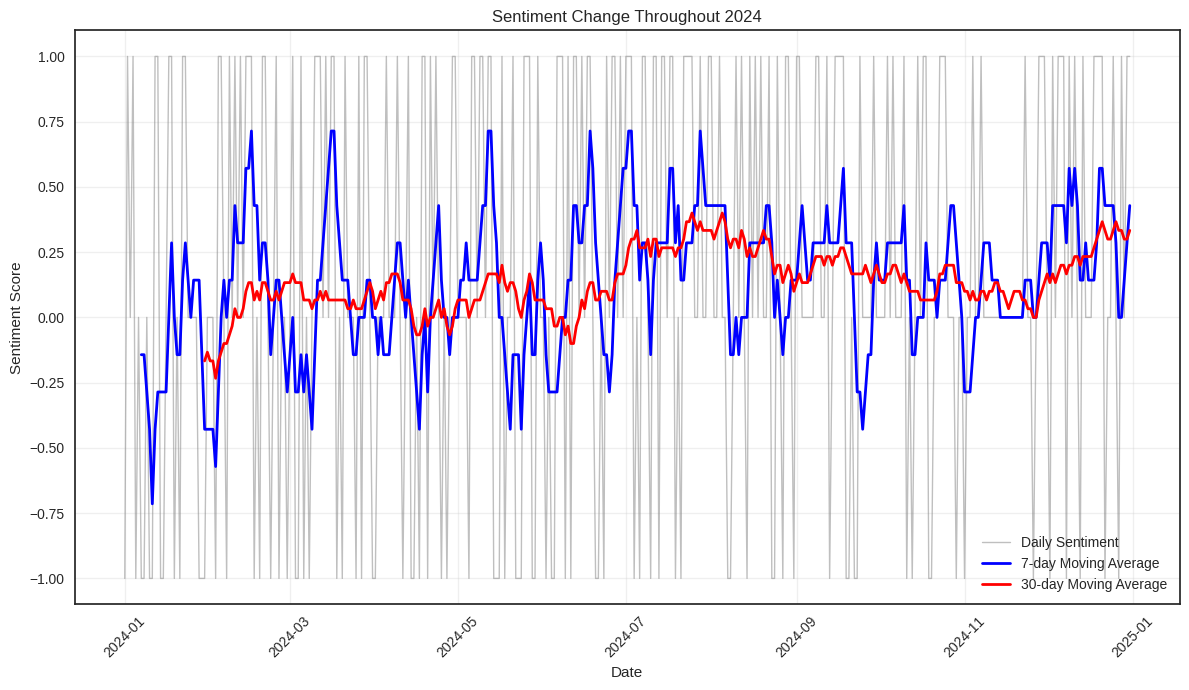

<Figure size 1400x700 with 0 Axes>

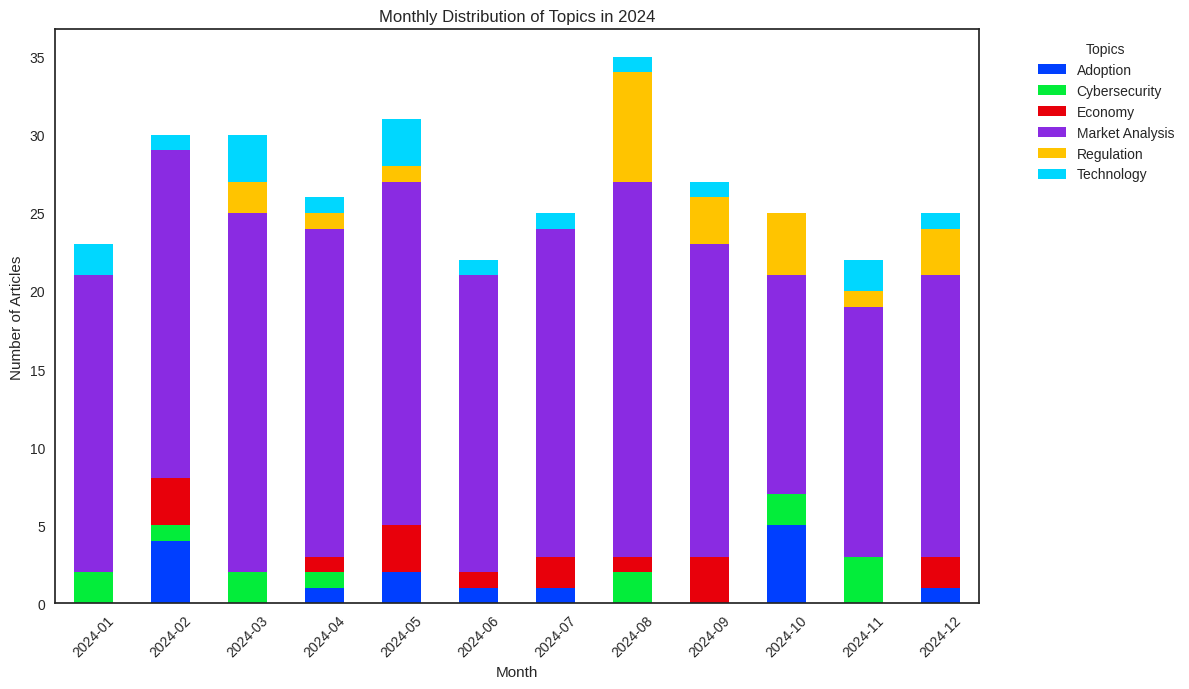


Summary Statistics for 2024:
Total Articles: 321
Average Daily Sentiment: 0.13
Most Common Topic: Market Analysis
Highest Sentiment: 1
Lowest Sentiment: -1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better visualization
plt.style.use('seaborn-v0_8-white')

# Convert string dates to datetime
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 12, 31)

temp = df_grouped
# Ensure grouped_date is datetime
df['grouped_date'] = pd.to_datetime(df_grouped['grouped_date'])

# Filter dataframe for 2024
df_2024 = df[(df['grouped_date'] >= start_date) &
             (df['grouped_date'] <= end_date)].copy()

# Set up the figure size for all plots
plt.rcParams['figure.figsize'] = [12, 7]

# 1. Distribution of Topics Chart
topic_columns = ['Adoption', 'Cybersecurity', 'Economy', 'Market Analysis',
                'Regulation', 'Technology']

topic_sums = df_2024[topic_columns].sum()
topic_distribution = pd.DataFrame({
    'Topic': topic_sums.index,
    'Count': topic_sums.values
})

plt.figure(1)
plt.pie(topic_distribution['Count'],
        labels=topic_distribution['Topic'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribution of News Topics in 2024')
plt.axis('equal')
plt.savefig('topic_distribution_2024.png', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

# 2. Sentiment Change Over Time Chart
plt.figure(2)
# Plot daily sentiment
plt.plot(df_2024['grouped_date'],
         df_2024['sentiment'],
         label='Daily Sentiment',
         alpha=0.5,
         color='gray',
         linewidth=1)

# Add moving averages
df_2024['MA7'] = df_2024['sentiment'].rolling(window=7).mean()
df_2024['MA30'] = df_2024['sentiment'].rolling(window=30).mean()

plt.plot(df_2024['grouped_date'],
         df_2024['MA7'],
         label='7-day Moving Average',
         color='blue',
         linewidth=2)

plt.plot(df_2024['grouped_date'],
         df_2024['MA30'],
         label='30-day Moving Average',
         color='red',
         linewidth=2)

plt.title('Sentiment Change Throughout 2024')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sentiment_change_2024.png', bbox_inches='tight', dpi=300)
plt.show()

plt.close()

# 3. Monthly Topic Distribution
df_2024['month'] = df_2024['grouped_date'].dt.strftime('%Y-%m')
monthly_topics = df_2024.groupby('month')[topic_columns].sum()

plt.figure(3, figsize=(14, 7))
monthly_topics.plot(kind='bar', stacked=True)
plt.title('Monthly Distribution of Topics in 2024')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_topics_2024.png', bbox_inches='tight', dpi=300)
plt.show()

plt.close()

# Print Summary Statistics
summary_stats = {
    'Total Articles': df_2024[topic_columns].sum().sum(),
    'Average Daily Sentiment': df_2024['sentiment'].mean(),
    'Most Common Topic': topic_distribution.sort_values('Count', ascending=False).iloc[0]['Topic'],
    'Highest Sentiment': df_2024['sentiment'].max(),
    'Lowest Sentiment': df_2024['sentiment'].min()
}

print("\nSummary Statistics for 2024:")
for key, value in summary_stats.items():
    if isinstance(value, float):
        print(f"{key}: {value:.2f}")
    else:
        print(f"{key}: {value}")


# Backtest

In [ ]:
pip install pyarrow pandas_ta seaborn matplotlib scikit-learn==1.3.1 yfinance


In [ ]:
import pandas as pd
import pandas_ta as ta
import numpy as np
from numpy import NaN
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import warnings

import os
import yfinance as yf
warnings.filterwarnings("ignore")

In [ ]:
def MutualInfo(df):
  X = df.drop(["signal","grouped_date"], axis=1)
  y = df["signal"]
  mi_scores = mutual_info_regression(X, y)
  mi_scores = pd.Series(mi_scores, index=X.columns)
  mi_scores.sort_values(ascending=False, inplace=True)
  print(mi_scores)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
import yfinance as yf
warnings.filterwarnings("ignore")

# df must have index as datetime64[ns], and 'signal' column
# freq can be 'daily', 'hourly', or 'minute'
def run_backtest(df, freq='daily'):

  # check if df.index is datetime64[ns]
  if df.index.dtype != 'datetime64[ns]':
    raise ValueError("df.index must be in datetime64[ns]")

  # ------------------ Return Data Preparation ------------------
  if 'return_forward' in df.columns:
    df = df.drop(columns=['return_forward'])

  if freq == 'daily':
    df = concat_return(df, freq='daily')
    period_in_a_year = 365
  elif freq == 'hourly':
    df = concat_return(df, freq='hourly')
    period_in_a_year = 365 * 24
  elif freq == 'minute':
    df = concat_return(df, freq='minute')
    period_in_a_year = 365 * 24 * 60
  else:
    raise ValueError("Invalid freq argument. Must be 'daily', 'hourly', or 'minute'")

  # ------------------ Data check ------------------
  if df['signal'].isnull().values.any():
    raise ValueError("DataFrame contains NA values")
  if 'signal' not in df.columns:
    raise ValueError("DataFrame is missing required column: 'signal'")

  # ------------------ Average Return & Sharpe ------------------
  # Calculate daily returns
  df['strategy_return'] = df['signal'] * df['return_forward']

  # Overall Geometric Annual Return and Sharpe Ratio
  num_periods = len(df)
  # annual_return = (1 + df['strategy_return']).prod()**(period_in_a_year/num_periods) - 1
  annual_return = df['strategy_return'].mean() * period_in_a_year

  period_std = df['strategy_return'].std()
  annual_std = period_std * np.sqrt(period_in_a_year)
  overall_sharpe = annual_return / annual_std

  print(f"Overall Annual Return: {round(annual_return*100, 2)}%")
  print("Overall Annual Sharpe Ratio:", round(overall_sharpe, 4))

  # ------------------ Maximum Drawdown ------------------
  df['cum_return'] = (1 + df['strategy_return']).cumprod()
  rolling_max = df['cum_return'].cummax()
  df['drawdown'] = (df['cum_return'] - rolling_max) / rolling_max
  max_drawdown = df['drawdown'].min()
  print("Maximum Drawdown:", round(max_drawdown * 100, 2), "%")

  # ------------------ Win/Loss Ratio ------------------
  winning_trades = (df['strategy_return'] > 0).sum()
  losing_trades = (df['strategy_return'] < 0).sum()
  if losing_trades > 0:
    win_loss_ratio = winning_trades / losing_trades
  else:
    win_loss_ratio = np.nan # no losing trades (advoid division by zero)
  print("Win/Loss Ratio:", round(win_loss_ratio, 4))

  # ------------------ Alpha and Beta ------------------
  # Beta = Cov(strategy_return, acutal_return) / Var(actual_return)
  cov_matrix = np.cov(df['strategy_return'], df['return_forward'])
  beta = cov_matrix[0, 1] / cov_matrix[1, 1]

  # Alpha = mean(strategy_return) - Beta * mean(actual_return)
  alpha_daily = df['strategy_return'].mean() - beta * df['return_forward'].mean()

  # Annualize alpha
  alpha_annualized = (1 + alpha_daily) ** period_in_a_year - 1

  print("Alpha:", round(alpha_annualized, 4))
  print("Beta:", round(beta, 4))

  # ------------------- Yearly Metrics -------------------
  df['year'] = df.index.year

  yearly_data = df.groupby('year').apply(lambda subdf: pd.Series({
    # 'yearly_return': (1 + subdf['strategy_return']).prod()**(period_in_a_year/len(subdf)) - 1,
    'yearly_return': subdf['strategy_return'].mean() * period_in_a_year,
    'yearly_std': subdf['strategy_return'].std() * np.sqrt(period_in_a_year),
    'yearly_beta': np.cov(subdf['strategy_return'], subdf['return_forward'])[0,1] /
                    np.cov(subdf['strategy_return'], subdf['return_forward'])[1,1],
    'yearly_alpha': (
      subdf['strategy_return'].mean()
      - (
        np.cov(subdf['strategy_return'], subdf['return_forward'])[0,1]
        / np.cov(subdf['strategy_return'], subdf['return_forward'])[1,1]
      )
      * subdf['return_forward'].mean()
    ) * period_in_a_year
  })).reset_index()

  yearly_data['yearly_sharpe'] = yearly_data['yearly_return'] / yearly_data['yearly_std']
  print("\nYearly Metrics:")
  print(yearly_data)

  # ------------------------- Plots ----------------------
  df['cum_return_plot'] = (1 + df['strategy_return']).cumprod() - 1
  df['bh_cum_return_plot'] = (1 + df['return_forward']).cumprod() - 1

  # cumulative return plot
  plt.figure(figsize=(8,4))
  plt.plot(df.index, df['cum_return_plot'], label='Strategy Return')
  plt.plot(df.index, df['bh_cum_return_plot'], label='Buy and Hold')
  plt.title('Strategy Cumulative Return')
  plt.xlabel('Date')
  plt.ylabel('Cumulative Return')
  plt.legend()
  plt.show()

  # Signal weight plot
  plt.figure(figsize=(8,4))
  plt.plot(df.index, df['signal'], label='Signal')
  plt.title('Signal Weight Over Time')
  plt.xlabel('Date')
  plt.ylabel('Weight')
  plt.legend()
  plt.show()


def concat_return(df, freq='daily'):
  if freq == 'daily':
    file_path = "/content/drive/MyDrive/btcusd_daily_price.parquet"
  elif freq == 'hourly':
    file_path = "../../bitcoin_historical_price/btcusd_hourly_price.parquet"
  elif freq == 'minute':
    file_path = "../../bitcoin_historical_price/btcusd_minute_price.parquet"
  else:
    raise ValueError("Invalid freq argument. Must be 'daily', 'hourly', or 'minute'")

  if os.path.exists(file_path):
    df_btc_return = pd.read_parquet(file_path)
  else:
    raise FileNotFoundError("Check file path: return data not found.")

  merged_df = pd.merge(df, df_btc_return[['return_forward']], left_index=True, right_index=True, how='inner')
  return merged_df

In [ ]:
data = pd.read_parquet("/content/drive/MyDrive/keybased_grouped.parquet")
data

NameError: name 'pd' is not defined

In [ ]:

data = data [:-1]
data = data.drop(["__index_level_0__","Other"],axis=1)
data['signal'] = data['sentiment'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
data['grouped_date'] = pd.to_datetime(data['grouped_date']).dt.date

data = data.rename(columns={'grouped_date': 'date'})  # Rename the column
test_startdate = pd.to_datetime("2024-01-01").date()
test_enddate = pd.to_datetime("2024-12-31").date()

data = data[(data['date'] >= test_startdate) & (data['date'] <= test_enddate)]

data = data.set_index('date')  # Set the renamed column as the index
data

,sentiment,Adoption,Cybersecurity,Economy,Market Analysis,Regulation,Technology,signal
date,,,,,,,,
2024-01-01,5,1,8,4,57,23,13,1
2024-01-02,-54,3,21,9,160,76,30,-1
2024-01-03,35,8,33,5,181,101,45,1
2024-01-04,28,5,36,8,158,96,45,1
2024-01-05,10,7,31,11,132,82,37,1
...,...,...,...,...,...,...,...,...
2024-12-27,19,10,8,12,106,12,16,1
2024-12-28,8,13,0,11,51,10,2,1
2024-12-29,-7,3,0,4,44,4,4,-1


In [ ]:
nan_counts_before = data.isna().sum()
print(nan_counts_before)

sentiment          0
Adoption           0
Cybersecurity      0
Economy            0
Market Analysis    0
Regulation         0
Technology         0
signal             0
dtype: int64


Overall Annual Return: -92.0%
Overall Annual Sharpe Ratio: -1.7684
Maximum Drawdown: -70.35 %
Win/Loss Ratio: 0.9081
Alpha: -0.3782
Beta: -0.4899

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2024      -0.919951    0.520229    -0.489904     -0.474865      -1.768356


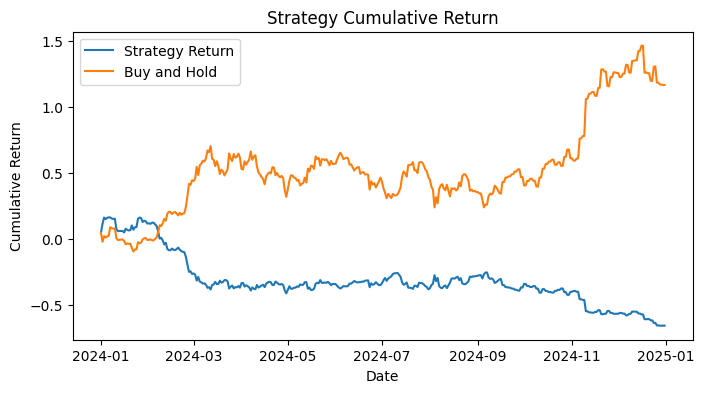

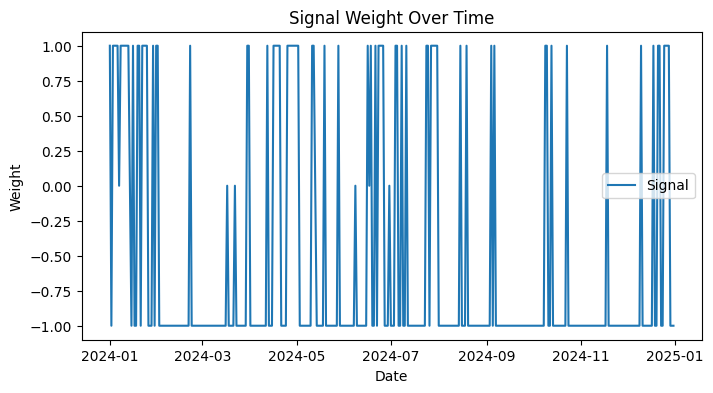

In [ ]:
data.to_parquet("keybased_final.parquet")
data.index = pd.to_datetime(data.index)

run_backtest(data)

In [ ]:
btc_price.head()

,return_forward_1d
Date,
2021-01-01,0.013190
2021-01-02,0.093713
2021-01-03,0.021212
2021-01-04,-0.025416
2021-01-05,0.063689


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

x = pd.DataFrame()
x['signal'] = btc_price["return_forward_1d"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Assuming df1 and df2 are your two dataframes with a 'signal' column
# Ensure both dataframes are aligned (e.g., same index and sorted by date)
assert x.shape[0] == data.shape[0], "Dataframes must have the same number of rows"

# Extract the signal columns from both dataframes
true_signals = x['signal']  # Ground truth signals
predicted_signals = data['signal']  # Predicted signals

# Calculate precision, recall, and F1 score
precision = precision_score(true_signals, predicted_signals, average='binary', pos_label=1)
recall = recall_score(true_signals, predicted_signals, average='binary', pos_label=1)
f1 = f1_score(true_signals, predicted_signals, average='binary', pos_label=1)

# Display the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.45
Recall: 0.50
F1 Score: 0.47
